# ニューラルネットワークの復習

## 数学とPython

Pythonを使ってベクトルや行列を生成してみる. 

In [2]:
import numpy as np

x = np.array([1, 2, 3])
x.__class__

numpy.ndarray

In [3]:
x.shape

(3,)

In [4]:
x.ndim

1

In [6]:
W = np.array([[1, 2, 3], [4, 5, 6]])
W.shape

(2, 3)

In [7]:
W.ndim

2

行列の要素関を計算してみる. 

In [10]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0, 1, 2], [3, 4, 5]])
W + x

array([[2, 4, 6],
       [5, 7, 9]])

In [11]:
W * X

array([[ 0,  2,  6],
       [12, 20, 30]])

### ブロードキャスト

numpyの多次元配列では、形状の異なる配列どうしの演算も可能である. 

In [12]:
A = np.array([[1, 2], [3, 4]])
A * 10

array([[10, 20],
       [30, 40]])

In [13]:
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

### ベクトルの内積と行列積

転地操作などは特に起こってはいないようだ.


In [15]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.dot(a, b) 

32

In [16]:
A = np.array([[1, 2], [3,4]])
B = np.array([[5, 6], [7,8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [18]:
# 行ベクトルを引数にしているのに, そのまま計算がでしまうのは
# 若干恐いのだが..
np.dot(A, a[:2])

array([ 5, 11])

numpyについては[100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)をやるのが一番よい. 

## ニューラルネットワークの推論

In [3]:
import numpy as np
W1 = np.random.randn(2, 4) # 重み
b1 = np.random.randn(4) #バイアス
x = np.random.randn(10, 2) # 入力
h = np.dot(x, W1) + b1

In [7]:
def sigmoid (x):
    return 1 / (1 + np.exp(-x))

In [9]:
W2 = np.random.randn(4,3)
b2 = np.random.randn(3)
a = sigmoid(h)
s = np.dot(a, W2) + b2

In [10]:
a

array([[0.44917117, 0.99872365, 0.61989562, 0.97834934],
       [0.36657851, 0.95697017, 0.74822877, 0.89497243],
       [0.59540909, 0.95757735, 0.80895092, 0.69281392],
       [0.84417831, 0.86370153, 0.90049452, 0.1387022 ],
       [0.58505863, 0.61271726, 0.87790381, 0.32350186],
       [0.49862698, 0.68129517, 0.85537096, 0.48635132],
       [0.43122638, 0.89199907, 0.80154119, 0.76031544],
       [0.61556464, 0.97093631, 0.80138559, 0.71710026],
       [0.75394978, 0.42378589, 0.91886466, 0.08985318],
       [0.42833697, 0.88251263, 0.80391274, 0.75282892]])

In [13]:
sigmoid(h[0,0])

0.4491711688330162

> スコアとは「確率」になる前の値である。スコアの値が高ければ高いほど、そのニューロンに血会おうするクラスの確率も高くなる. 一般にはスコアをSoftmax関数に入れて確率値に変換する. 

### レイヤとしてのクラス化と順伝播の実装

本書では次の実装ルールのもとニューラルネットワークを実装したＰｙｔｈｏｎクラスを作成していく. なお, 実装自体はPythonファイルに行うとする. 

- すべてのレイヤは、メソッドとしてforward()とbackward()を持つ
- すべてのレイヤは、インスタンス変数としてparmsとgradsを持つ

`py/forward_net.py`を利用して, Affine, Sigmoido, Affineレイヤを経てスコアSを出力するニューラルネットワークを作成する. 

In [1]:
from pynet import forward_net

In [2]:
import numpy as np
x = np.random.randn(10, 2)
model = forward_net.TwoLayerNet(2, 4, 3)
s = model.predict(x)

In [3]:
s

array([[-0.00376227,  0.85517399,  0.16611614],
       [-0.0862226 ,  0.98878212,  0.20656062],
       [-0.32080132,  1.22949549,  0.25314898],
       [-0.6421173 ,  1.0057909 , -0.06976051],
       [-0.35781459,  0.93511593,  0.03493629],
       [ 0.23169698,  0.33067772,  0.00243652],
       [ 0.60621753,  0.11973821,  0.45807412],
       [ 0.29788205,  0.47360629,  0.16196393],
       [ 0.63872655,  0.0241712 ,  0.42569685],
       [ 0.20487644,  0.79631997,  0.35448416]])

## ニューラルネットワークの学習


ニューラルネットワークではどれだけ学習がうまくいっているのかを示す指標を「損失」という。損失は学習データにおいて、パラメータがどれだけ悪いかをスカラ値として算出したものとなる。
多クラス分類を行うニューラルネットワークの場合、損失関数として交差エントロピー誤差（Cross Entropy Error)を用いる場合が多くある. 

交差エントロピーにはスコアをSoftmaxで変換する必要がある. 

$$
y_k = \frac{\exp(s_k)}{\sum^n_{i=1}\exp(s_i)}
$$

この$y_k$はクラスKに所属する確率である. クロスエントロピーはこの値を使って次式で算出される. $t_k$はクラスkが正解であるならば1、不正解ならば0となる値である. いわゆるone-hotベクターであｒ. 

$$
L=-\sum_kt_k\log y_k
$$

さらにミニバッチ処理を考慮したときには交差エントロピー誤差は次式で表される. 
$y_{nk}はデータnがクラスkに所属する確率である. 

$$
L = -\frac{1}{N}\sum_n\sum_kt_{nk}\log y_{nk}
$$






### Repeat ノード

分岐ノードとは2つの分岐であったが、
一般にはＮ個に分岐するノードが考えられる。
逆伝搬はＮ個の勾配の総和として求めることができる。




In [4]:
import numpy as np
D, N = 8, 7
x = np.random.randn(1,D)#入力
y = np.repeat(x, N, axis=0) # forward

dy = np.random.randn(N, D)
dx = np.sum(dy, axis = 0, keepdims =True) # 行に和を取る、つまり列和

In [6]:
dx.shape

(1, 8)

### Sumノード

上流からの勾配をすべての→に分配する。これは加算ノードの逆伝搬の自然な拡張となる。


In [7]:
import numpy as np
D, N = 8, 7
x = np.random.randn(D, N)
y = np.sum(x, axis=0, keepdims=True)
dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)

### 3点リーダー

値の深いコピー。メモリの位置は変えないであたいだけを変更する


In [28]:
a = np.array([1,2,3])
print(id(a))
b = np.array([4,5,6])
a[...] = b
c = b

2751234343440


In [20]:
id(a[0])

2751216855032

In [21]:
id(b[0])

2751216855032

In [29]:
id(c[0])

2751216855320

In [24]:
id(a)

2751241446304

In [25]:
id(b)

2751236158528

In [26]:
id(c)

2751236158528

In [30]:
a = np.arange(10).reshape((2,5))

In [31]:
a.sum(axis=0)

array([ 5,  7,  9, 11, 13])

In [32]:
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

### 重みの更新

誤差逆伝搬法によって勾配を求めることができたら、その勾配を使ってニューラルネットワークのパラメータの更新をおこなう。

- ミニバッチ：訓練データからランダムにデータを抽出
- 勾配の算出：各重みパラメータに関する損失関数の勾配を求める
- パラメータの更新：勾配を使って重みパラメータを更新
- くり返す

勾配は損失を「増やす」方向であるので、勾配の逆方向に更新することで損失関数を減らすことができる。これが勾配降下法という。その中でもＳＧＤという方法がある。これはミニバッチに対する降下法である。

$$
W\leftarrow W-\eta\frac{\delta L}{\delta W}
$$



## ニューラルネットワークで問題を解く

### スパイラルデータセット

In [1]:
import sys
sys.path.append("deep-learning-from-scratch-2")
from dataset import spiral

In [2]:
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


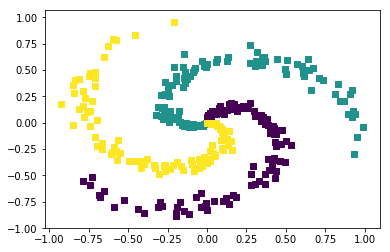

In [5]:
shape = ["*", "h", "s"]
plt.scatter(x[:,0], x[:, 1], c=t.argmax(axis=1), marker="s")

xで保持した二次元データに対して、tがone-hotベクターで3水準の分類情報を保持している. これをニューラルネットワークで分類できるのかを挑戦してみる. 

In [8]:
t.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

### 学習用のソースコード

In [1]:
import sys
sys.path.append("deep-learning-from-scratch-2")

import numpy as np
from pynet.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from pynet.two_layer_net import TwoLayerNet

In [2]:
# ハイパパラメータの調整
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.

In [4]:
# データの読み込み、モデルとオプティマイザの生成
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr = learning_rate)

# 学習でしようする変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters * batch_size:(iters+1)*batch_size]
        batch_t = t[iters * batch_size:(iters+1)*batch_size]
        
        # 勾配を求めてパラメータを更新
        loss = model.forward(batch_x, batch_t)
        
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 学習経過を出力
        if (iters + 1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epch %d | iter %d / %d | loss %.2f' 
                 % (epoch+1, iters+1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0
              
    
    

| epch 1 | iter 10 / 10 | loss 1.20
| epch 2 | iter 10 / 10 | loss 1.17
| epch 3 | iter 10 / 10 | loss 1.14
| epch 4 | iter 10 / 10 | loss 1.11
| epch 5 | iter 10 / 10 | loss 1.14
| epch 6 | iter 10 / 10 | loss 1.12
| epch 7 | iter 10 / 10 | loss 1.09
| epch 8 | iter 10 / 10 | loss 1.05
| epch 9 | iter 10 / 10 | loss 1.07
| epch 10 | iter 10 / 10 | loss 1.08
| epch 11 | iter 10 / 10 | loss 1.03
| epch 12 | iter 10 / 10 | loss 1.00
| epch 13 | iter 10 / 10 | loss 0.97
| epch 14 | iter 10 / 10 | loss 0.95
| epch 15 | iter 10 / 10 | loss 0.98
| epch 16 | iter 10 / 10 | loss 0.96
| epch 17 | iter 10 / 10 | loss 0.92
| epch 18 | iter 10 / 10 | loss 0.91
| epch 19 | iter 10 / 10 | loss 0.93
| epch 20 | iter 10 / 10 | loss 0.91
| epch 21 | iter 10 / 10 | loss 0.91
| epch 22 | iter 10 / 10 | loss 0.86
| epch 23 | iter 10 / 10 | loss 0.87
| epch 24 | iter 10 / 10 | loss 0.86
| epch 25 | iter 10 / 10 | loss 0.84
| epch 26 | iter 10 / 10 | loss 0.80
| epch 27 | iter 10 / 10 | loss 0.81
| epch 28 

| epch 224 | iter 10 / 10 | loss 0.16
| epch 225 | iter 10 / 10 | loss 0.15
| epch 226 | iter 10 / 10 | loss 0.16
| epch 227 | iter 10 / 10 | loss 0.15
| epch 228 | iter 10 / 10 | loss 0.15
| epch 229 | iter 10 / 10 | loss 0.15
| epch 230 | iter 10 / 10 | loss 0.15
| epch 231 | iter 10 / 10 | loss 0.16
| epch 232 | iter 10 / 10 | loss 0.15
| epch 233 | iter 10 / 10 | loss 0.15
| epch 234 | iter 10 / 10 | loss 0.15
| epch 235 | iter 10 / 10 | loss 0.15
| epch 236 | iter 10 / 10 | loss 0.15
| epch 237 | iter 10 / 10 | loss 0.15
| epch 238 | iter 10 / 10 | loss 0.15
| epch 239 | iter 10 / 10 | loss 0.14
| epch 240 | iter 10 / 10 | loss 0.15
| epch 241 | iter 10 / 10 | loss 0.15
| epch 242 | iter 10 / 10 | loss 0.16
| epch 243 | iter 10 / 10 | loss 0.14
| epch 244 | iter 10 / 10 | loss 0.15
| epch 245 | iter 10 / 10 | loss 0.15
| epch 246 | iter 10 / 10 | loss 0.15
| epch 247 | iter 10 / 10 | loss 0.15
| epch 248 | iter 10 / 10 | loss 0.14
| epch 249 | iter 10 / 10 | loss 0.15
| epch 250 |

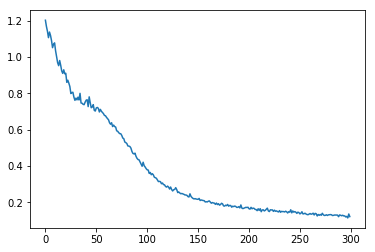

In [18]:
plt.plot(loss_list)

### Trainerクラス

先ほど書いたような学習の処理を毎度記述するのは大変である。
そこで、Trainerクラスで児童かを行う. 



In [19]:
from pynet.trainer import Trainer

In [20]:
batch_size = 30
hidden_size = 10
learning_rate = 1.0

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.41
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.18
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.15
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.15
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.06
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.05
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 0.99
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 0.97
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 0.95
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 0.97
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 0.96
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.93
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.91
| epoch 2

| epoch 195 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 196 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 197 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 198 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 199 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 200 |  iter 1 / 10 | time 0[s] | loss 0.18
| epoch 201 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 202 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 203 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 204 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 205 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 206 |  iter 1 / 10 | time 0[s] | loss 0.18
| epoch 207 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 208 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 209 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 210 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 211 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 212 |  iter 1 / 10 | time 0[s] | loss 0.15
| epoch 213 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 214 |  iter 1 / 10 | ti

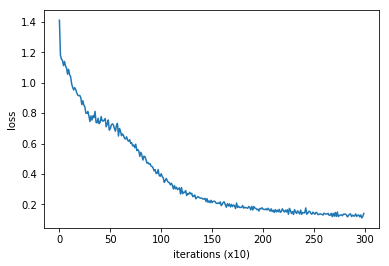

In [22]:
x, t = spiral.load_data()
model = TwoLayerNet(input_size = 2, hidden_size= hidden_size, output_size = 3)
optimizer = SGD(lr = learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()

## 計算の高速化

### 単精度の利用

ニューラルネットワークでは一般にデータの転送速度が問題となるため、
データ自体は小さい方が良い。その意味では単精度でも十分な精度のもと
学習が可能であるため、単精度を用いる方が高速になる. 

numpyには16バイト型もあるが計算上は32バイトで行われるため、32バイトで値を持っていれば良い. 


In [23]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')